In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics


from sklearn.decomposition import PCA, IncrementalPCA 
digits = datasets.load_digits() 

X = digits.data  
Y = digits.target


In [ ]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [ ]:
type(digits.data)

numpy.ndarray

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
# digits

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
n_comp = 2

pca = PCA(n_components=n_comp)
X_r = pca.fit_transform(X)

In [ ]:
X_r

array([[ -1.25946678,  21.27488596],
       [  7.95760602, -20.76868869],
       [  6.991926  ,  -9.95599456],
       ...,
       [ 10.80128808,  -6.96025033],
       [ -4.87210506,  12.42395358],
       [ -0.34438232,   6.36554059]])

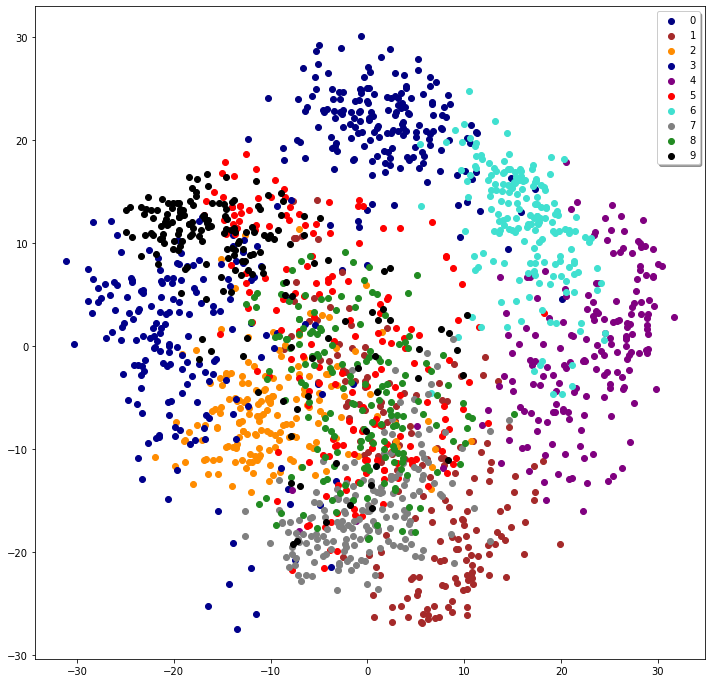

In [ ]:
targets = np.unique(digits.target)
colors = ['navy','brown','darkorange','darkblue','purple','red','turquoise','gray','forestgreen','black']
label_names = digits.target_names
plt.figure(figsize=(12, 12))

for t, c, n in zip(targets, colors, label_names):
    plt.scatter(X_r[Y==t, 0], X_r[Y==t, 1], c=c, label=n)
# 0:一維x軸 1:二維y軸
plt.legend(loc="best", shadow=True)

使用KNN演算法分類

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
k = 3
# 就是那點資料附近ㄉ 誤差值????
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train, y_train)

# 預測分類
y_pred = knn_model.predict(x_test)


# 評估結果
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
# test正確 pred預測ㄉ結果  
print(f'預測正確率為： {acc}')
# f把字串跟變數弄起來 特殊用法  變數要{}
# 首先random_state和random seed是一樣的，都是設置隨機種子
# 在模型中設置random_state作用就是可以使每次用相同的訓練集相同參數可以得到相同的結果。 
# 不然的話，每訓練一次，結果就會有波動。 如果random_state都設置好，當別人拿到你的代碼運行時就能得到和你一樣的結果，復現你的過程。

預測正確率為： 0.9861111111111112


SVM

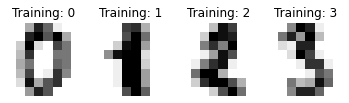

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: ' + str(label))

In [ ]:
n_samples = len(digits.images)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64

data = digits.images.reshape((n_samples, 64))
# data = digits.images.reshape((n_samples, -1))
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
# 產生SVC分類器
classifier = svm.SVC(gamma=0.001)

# 用前半部份的資料來訓練
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

expected = digits.target[n_samples // 2:]

#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples // 2:])
# //整數除法
print(expected[:20])
print(predicted[:20])

[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2]
[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2]


In [ ]:
print("Confusion matrix:\n", metrics.confusion_matrix(expected, predicted))
# 這個矩陣對角線左上方第一個數字 87
# 代表實際為0且預測為0的總數有87個
# 同一列(row)第五個元素則代表，實際為0但判斷為4的資料個數為1個。

Confusion matrix:
 [[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


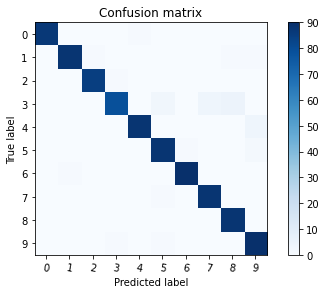

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix',cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names, rotation=-10)
    # 字母歪歪rotation
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# cmap=plt.cm.Blues
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

In [ ]:
# 以手寫影像3為例，我們可以用四個數字來探討判斷的精準度。
# True Positive(TP,真陽):實際為3且判斷為3，共79個
# False Positive(FP,偽陽):判斷為3但判斷錯誤，共2個
# False Negative(FN,偽陰):實際為3但判斷錯誤，共12個
# True Negative(TN,真陰):實際不為3，且判斷正確。也就是其餘899-79-2-12=885個
print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

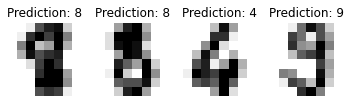

In [ ]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: ' +str(prediction))

plt.show()
# 可以觀察測試影像以及預測(分類)結果得對應關係。